<a href="https://colab.research.google.com/github/LBMH-lang/CTDLGT_Python/blob/main/code_ph%C3%A2n_t%C3%ADch_th%E1%BB%91ng_k%C3%AA_m%C3%B4_t%E1%BA%A3_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cài đặt các thư viện

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
import scipy.stats as stats

Tải dữ liệu

In [4]:
Du_lieu1 = pd.read_csv("ehact_2014.csv")

In [5]:
Du_lieu1.sample(10)

,tucaseid,tuactivity_n,eueatsum,euedur,euedur24
34578,20140403141072,1,-1,-1,-1
100725,20141109141755,13,-1,-1,-1
109074,20141111140639,16,-1,-1,-1
50093,20140505141827,3,-1,-1,-1
54947,20140605141238,11,-1,-1,-1
69136,20140706142423,9,-1,-1,-1
107565,20141110142190,17,-1,-1,-1
100558,20141109141619,10,1,5,5
113395,20141211140859,16,-1,-1,-1
45693,20140504141601,4,-1,-1,-1


Kiểm định Bartlett

In [10]:
high = low =  placebo = []
high = Du_lieu1['tucaseid'][Du_lieu1['tuactivity_n'][Du_lieu1['eueatsum'][Du_lieu1['euedur'][Du_lieu1['euedur24'] == 'high']]]]
low = Du_lieu1['tucaseid'][Du_lieu1['tuactivity_n'][Du_lieu1['eueatsum'][Du_lieu1['euedur'][Du_lieu1['euedur24'] == 'low']]]]
placebo = Du_lieu1['tucaseid'][Du_lieu1['tuactivity_n'][Du_lieu1['eueatsum'][Du_lieu1['euedur'][Du_lieu1['euedur24'] == 'placebo']]]]

In [11]:
tucaseid = Du_lieu1['tucaseid']
tuactivity_n = Du_lieu1['tuactivity_n']
eueatsum = Du_lieu1['eueatsum']
euedur = Du_lieu1['euedur']
euedur24 = Du_lieu1['euedur24']

In [12]:
# tiếp theo ta sẽ dùng Kiểm định tính thuần nhất của phương sai (homogeneity of variance)
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett(tucaseid,tuactivity_n,eueatsum,euedur,euedur24)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova')
else:
    print('Phương sai các nhóm  bằng nhau.')
print('-'*50)

Kiểm định Bartlett:
BartlettResult(statistic=16383000.788372548, pvalue=0.0)
Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova
--------------------------------------------------


Trung bình cộng của từng cột trong tập dữ liệu

In [13]:
Mean_EZ = Du_lieu1.mean(axis = 0)
Mean_EZ

tucaseid        2.014066e+13
tuactivity_n    1.190398e+01
eueatsum       -8.589866e-01
euedur          6.280287e-01
euedur24        6.267862e-01
dtype: float64

Phương sai của từng cột trong tập dữ liệu

In [23]:
Mean_EZ2 = Du_lieu1.var(axis= 0)
Mean_EZ2

tucaseid        1.202929e+17
tuactivity_n    6.762923e+01
eueatsum        2.622685e-01
euedur          2.086272e+02
euedur24        2.080945e+02
dtype: float64

Độ lệch chuẩn của từng cột trong tập dữ liệu

In [14]:
Mean_EZ3 = Du_lieu1.std(axis= 0)
Mean_EZ3

tucaseid        3.468327e+08
tuactivity_n    8.223699e+00
eueatsum        5.121216e-01
euedur          1.444393e+01
euedur24        1.442548e+01
dtype: float64

Giá trị lớn nhất và nhỏ nhất của từng cột trong tập dữ liệu

In [17]:
max1 = np.nanmax(Du_lieu1.iloc[:, 1].values)
min1 = np.nanmin(Du_lieu1.iloc[:, 1].values)
max2 = np.nanmax(Du_lieu1.iloc[:, 2].values)
min2 = np.nanmin(Du_lieu1.iloc[:, 2].values)
max3 = np.nanmax(Du_lieu1.iloc[:, 3].values)
min3 = np.nanmin(Du_lieu1.iloc[:, 3].values)
max4 = np.nanmax(Du_lieu1.iloc[:, 4].values)
min4 = np.nanmin(Du_lieu1.iloc[:, 4].values)


print('min của tucaseid:', min1)
print('max của tucaseid:', max1)
print('max của tuactivity_n:', max2)
print('min của tuactivity_n:', min2)
print('max của eueatsum:', max3)
print('min của eueatsum:', min3)
print('max của euedur:', max4)
print('min của euedur:', min4)


min của tucaseid: 1
max của tucaseid: 59
max của tuactivity_n: 1
min của tuactivity_n: -2
max của eueatsum: 735
min của eueatsum: -2
max của euedur: 735
min của euedur: -2


Trực quan hóa dữ liệu:

Đầu tiên hiển thị biểu đồ cho thuộc tính sepal length

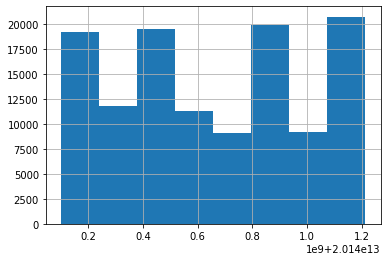

In [19]:
%matplotlib inline

Du_lieu1['tucaseid'].hist(bins=8)

Biểu đồ Boxplot

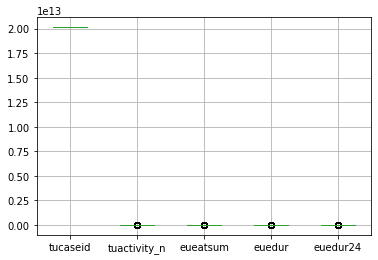

In [20]:
Du_lieu1.boxplot()

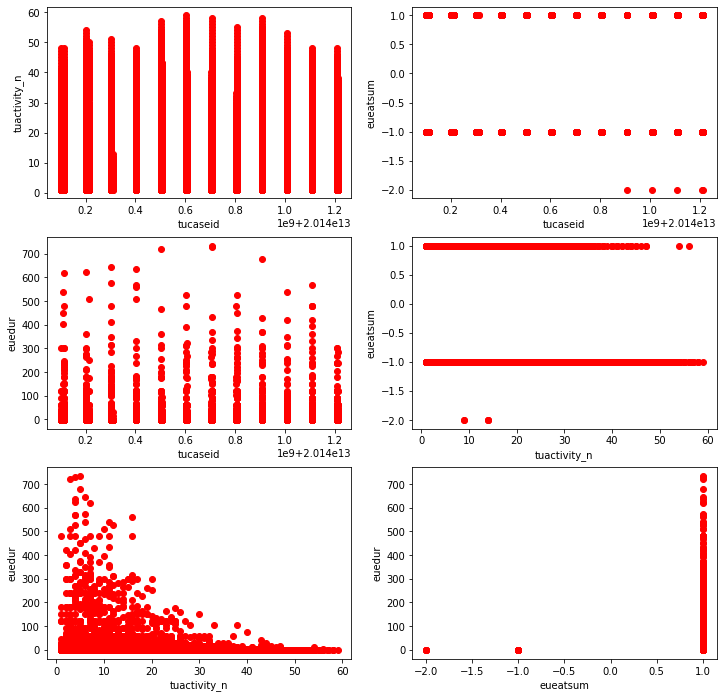

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(Du_lieu1[Du_lieu1.columns[i]], Du_lieu1[Du_lieu1.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(Du_lieu1.columns[i])
        axes[ax1][ax2].set_ylabel(Du_lieu1.columns[j])
        index = index + 1